## Week 3: Challenge 1

- Student: Nicolas Silva Andujar
- Teacher: José Manuel Magallanes

This notebook contains the exercises for challenge 1, related to the spatial data analysis.


1. Import the packages and load the geopandas files realted to countries, rivers and cities.

In [45]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("data","World_Countries","World_Countries.shp"))
roads=gpd.read_file(os.path.join("data","World_railroad","ne_10m_roads.shp"))
provincias=gpd.read_file(os.path.join("data","provincia","bol_admbnda_adm2_gov_2020514.shp"))

2. We verify that all the layers have the same projection (CRS)

In [46]:
countries.crs==provincias.crs==provincias.crs==roads.crs==roads.crs

True

3. We filter our map to get only spacial data related to Belgium

In [48]:
bolivia=countries[countries.COUNTRY=='Bolivia']

In [49]:
roadsBolivia_clipped = gpd.clip(roads, bolivia)

provinciasBolivia_clipped = gpd.clip(provincias, mask=bolivia)


<Axes: >

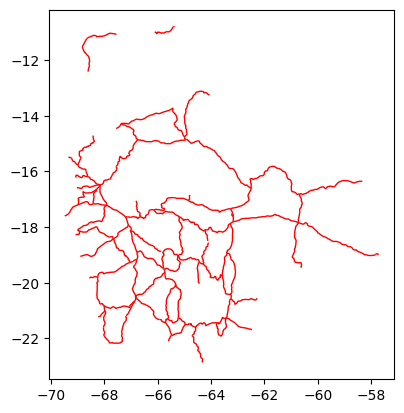

In [50]:
roadsBolivia_clipped.plot(edgecolor='red',
            linewidth=1)

<Axes: >

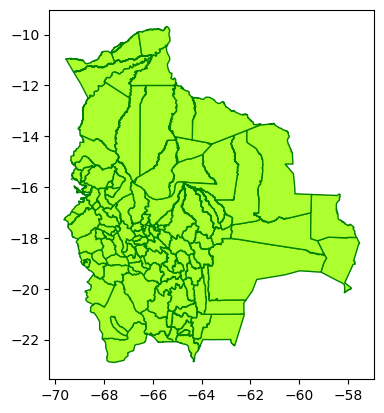

In [51]:
provinciasBolivia_clipped.plot(marker='+', color='greenyellow', markersize=15, edgecolor = "green")

<Axes: >

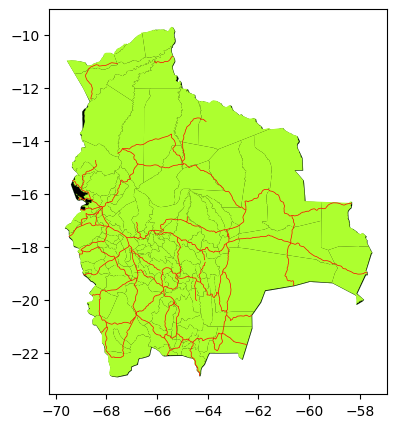

In [56]:
base = bolivia.plot(facecolor="black", edgecolor='green', linewidth=0.1,figsize=(5,5))
provinciasBolivia_clipped.plot(marker='+', color='greenyellow', markersize=15,
                    ax=base)
roadsBolivia_clipped.plot(edgecolor='red', linewidth=0.5,
                    ax=base)

### Reprojecting

In [57]:
bolivia.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [58]:
bolivia.centroid

C:\Users\Nicolas Silva\AppData\Local\Temp\ipykernel_13456\3561973308.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bolivia.centroid


24    POINT (-64.6706 -16.71497)
dtype: geometry

In [60]:
bolivia.to_crs(4326).crs.axis_info


[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [61]:
bolivia.to_crs(4326).centroid

C:\Users\Nicolas Silva\AppData\Local\Temp\ipykernel_13456\4080983340.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bolivia.to_crs(4326).centroid


24    POINT (-64.6706 -16.71497)
dtype: geometry

C:\Users\Nicolas Silva\AppData\Local\Temp\ipykernel_13456\3390016769.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bolivia.to_crs(4326).centroid.plot(color='red',ax=base4326)


<Axes: >

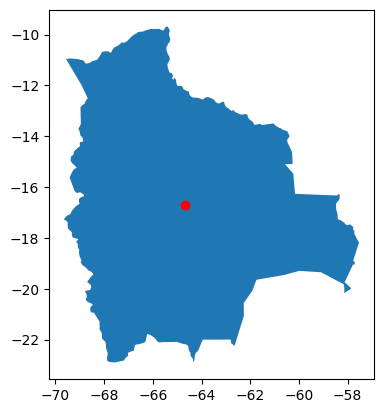

In [62]:
base4326=bolivia.to_crs(4326).plot()
bolivia.to_crs(4326).centroid.plot(color='red',ax=base4326)

In [63]:
bolivia_4326=bolivia.to_crs(4326)

provinciasBolivia_4326=provinciasBolivia_clipped.to_crs(bolivia_4326.crs)

roadsBolivia_4326=roadsBolivia_clipped.to_crs(bolivia_4326.crs)

In [64]:
# saving 
import os

bolivia_4326.to_file(os.path.join("data","boliviaMaps_4326.gpkg"), layer='country', driver="GPKG")
provinciasBolivia_4326.to_file(os.path.join("data","boliviaMaps_4326.gpkg"), layer='provinces', driver="GPKG")
roadsBolivia_4326.to_file(os.path.join("data","boliviaMaps_4326.gpkg"), layer='roads', driver="GPKG")

In [65]:
bolivia_4326.centroid.to_file(os.path.join("data","boliviaMaps_4326.gpkg"), layer='centroid', driver="GPKG")



C:\Users\Nicolas Silva\AppData\Local\Temp\ipykernel_13456\2907549721.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bolivia_4326.centroid.to_file(os.path.join("data","boliviaMaps_4326.gpkg"), layer='centroid', driver="GPKG")


In [66]:
import pandas as pd 
infoairports = pd.read_csv(os.path.join("data","bo-airports.csv"))

In [67]:
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,6184,SLLP,medium_airport,El Alto International Airport,-16.5132999420166,-68.19229888916016,13355,SA,Bolivia,BO,...,La Paz / El Alto,1,SLLP,LPB,NaN,NaN,https://en.wikipedia.org/wiki/El_Alto_Internat...,NaN,750,2008-07-14T12:56:12+00:00
1,6193,SLVR,large_airport,Viru Viru International Airport,-17.6448,-63.135399,1224,SA,Bolivia,BO,...,Santa Cruz,1,SLVR,VVI,NaN,NaN,https://en.wikipedia.org/wiki/Viru_Viru_Intern...,NaN,1050,2019-01-13T13:52:47+00:00
2,6180,SLCB,medium_airport,Jorge Wilsterman International Airport,-17.421100616455078,-66.1771011352539,8360,SA,Bolivia,BO,...,Cochabamba,1,SLCB,CBB,NaN,NaN,https://en.wikipedia.org/wiki/Jorge_Wilsterman...,NaN,750,2008-07-14T12:56:12+00:00
3,6189,SLSU,medium_airport,Juana Azurduy De Padilla Airport,-19.007099,-65.288696,9540,SA,Bolivia,BO,...,Sucre,0,SLSU,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Juana_Azurduy_de...,military,750,2020-02-09T15:04:10+00:00
4,6183,SLET,medium_airport,El Trompillo Airport,-17.8115997314,-63.1715011597,1371,SA,Bolivia,BO,...,Santa Cruz,1,SLET,SRZ,NaN,NaN,https://en.wikipedia.org/wiki/El_Trompillo_Air...,NaN,750,2012-01-28T13:03:47+00:00


In [68]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]


In [69]:
infoairports.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           205 non-null    object
 1   type           205 non-null    object
 2   latitude_deg   205 non-null    object
 3   longitude_deg  205 non-null    object
 4   elevation_ft   199 non-null    object
 5   region_name    205 non-null    object
 6   municipality   201 non-null    object
dtypes: object(7)
memory usage: 11.3+ KB


In [70]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now 
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           205 non-null    object 
 1   type           205 non-null    object 
 2   latitude_deg   205 non-null    float64
 3   longitude_deg  205 non-null    float64
 4   elevation_ft   199 non-null    float64
 5   region_name    205 non-null    object 
 6   municipality   201 non-null    object 
dtypes: float64(3), object(4)
memory usage: 11.3+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

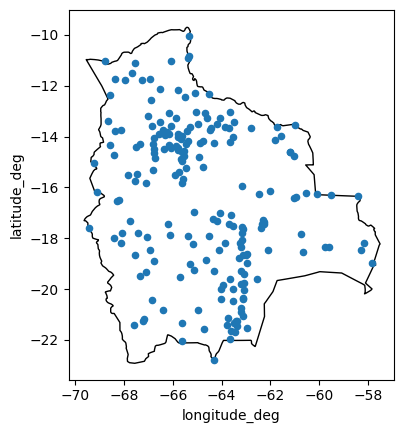

In [71]:
# let's plot

base = bolivia_4326.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [72]:
#lets plot
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=bolivia.crs.to_epsg())# the coordinates were in degrees - unprojected

<Axes: >

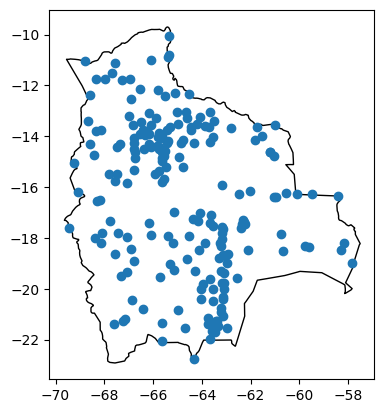

In [76]:
base = bolivia_4326.plot(color="white",edgecolor ="black")
airports.plot(ax=base)


In [77]:
type(airports), type(infoairports)


(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

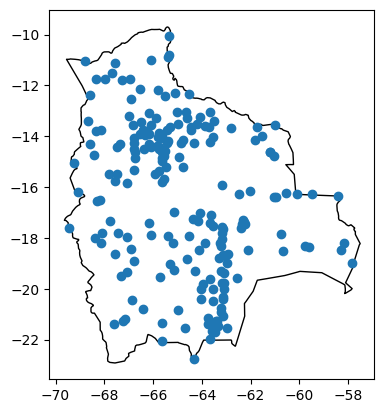

In [78]:
airports_4326=airports.to_crs(4326)

## then

base = bolivia_4326.plot(color='white', edgecolor='black')
airports_4326.plot(ax=base)

In [79]:
airports_4326['type'].value_counts() # this will not work: airports.type.value_counts()

type
small_airport     182
medium_airport     18
heliport            3
large_airport       1
closed              1
Name: count, dtype: int64

In [80]:
airports_4326.rename(columns={'type':'kind'},inplace=True)

In [82]:
airports_4326.to_file(os.path.join("data","boliviaMaps_4326.gpkg"), layer='airports', driver="GPKG")
